In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import seaborn as sns

### Useful Functions

In [3]:
def list_pickles(path):
    pickle_list = []
    for name in os.listdir(path):
        if name[-7:]=='.pickle':
            pickle_list.append(name)
    return pickle_list


def count_particles(shower_summary,central_det=True):
    diccionario=shower_summary[0]
    df1=shower_summary[1]
    df2=shower_summary[2]
    df3=shower_summary[3]
    energy=diccionario["PRME"]
    A1=len(df1)
    A2=len(df2)
    A3=len(df3)
    part_count= A1+A2+A3
    if central_det:
        df0=shower_summary[4]
        A0=len(df0)
        part_count=part_count + A0
    return energy,part_count

def get_delta_t(shower):
    df1=shower[1]
    df2=shower[2]
    df3=shower[3]
    df0=shower[4]
    try:
        t1= df1.iloc[0]["t"]
    except:
        t1=np.nan
    try:
        t2=df2.iloc[0]["t"]
    except:
        t2=np.nan
    try:
        t3=df3.iloc[0]["t"]
    except:
        t3=np.nan
    try:
        t0=df0.iloc[0]["t"]
    except:
        t0=np.nan

    d12=t1-t2
    d23=t2-t3
    d10=t1-t0
    d20=t2-t0
    d30=t3-t0
    d13=t1-t3
    return d10,d20,d30,d12,d23,d13
    

## Particle Count Histogram

### Data loading

In [4]:
parent_dir='C:\\Users\\cg_h2\\Documents\\pucp_array\\pickles\\'

showers=[]
pickle_names=list_pickles(parent_dir)
for pickle_name in pickle_names:
    pickle_path=os.path.join(parent_dir,pickle_name)
    with open(pickle_path, 'rb') as file:
        showers_i = pickle.load(file)
    showers=showers+showers_i
    print(f"{pickle_name} has been loaded")
## Loaded data can be found in list: showers


Energy_1.0E+04.pickle has been loaded
Energy_2.0E+04.pickle has been loaded
Energy_3.0E+04.pickle has been loaded
Energy_5.0E+04.pickle has been loaded
Energy_7.0E+04.pickle has been loaded


### Data Processing

In [5]:

e_list=[]
count_list=[]
for shower in showers:
    energy,part_count= count_particles(shower,central_det=True)
    e_list.append(energy)
    count_list.append(part_count)

print('Particles counted')
e_unique=list(set(e_list))
energies_and_counts={}
for energy in e_unique:
    c_list=[]
    for e,c in zip(e_list,count_list):
        if e==energy:
            c_list.append(c)
    energies_and_counts[energy]=c_list
    print(f"energy {energy}GeV has been processed")
    
    
#in the end, we have:  e_unique (unique values of the energies)
#                      energies_and_counts (dictionary that contains one list per energy, containing particle counts for each shower)

Particles counted
energy 20000GeV has been processed
energy 10000GeV has been processed
energy 30000GeV has been processed
energy 50000GeV has been processed
energy 70000GeV has been processed


### Plot

#### Plot all energies

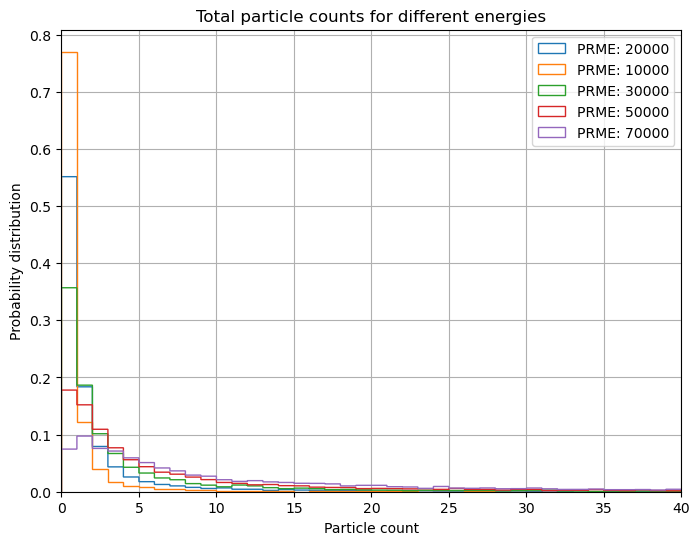

In [6]:
plt.figure(figsize=(8, 6))
for energy in e_unique:
    data=energies_and_counts[energy]
    bin_num=max(data)
    plt.hist(data, bins=bin_num,histtype="step", density=True, label=f'PRME: {energy}')

plt.xlabel('Particle count')
plt.ylabel('Probability distribution')
plt.title('Total particle counts for different energies')
plt.legend()
plt.xlim([0,40])    # X axis limits
plt.grid(True)
plt.show()


#### Plot a specific energy

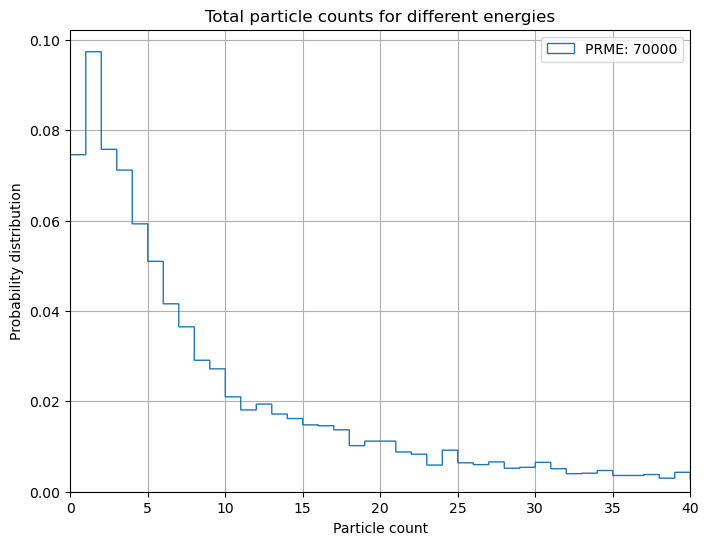

In [7]:
plt.figure(figsize=(8, 6))
for energy in e_unique:
    if energy in [70000]:    ## Energy value
        data=energies_and_counts[energy]
        bin_num=max(data)
        plt.hist(data, bins=bin_num,histtype="step", density=True, label=f'PRME: {energy}')

plt.xlabel('Particle count')
plt.ylabel('Probability distribution')
plt.title('Total particle counts for different energies')
plt.legend()
plt.xlim([0,40])    # X axis limits
plt.grid(True)
plt.show()


# Time Deltas Histogram

### Data loading

In [1]:
parent_dir='C:\\Users\\cg_h2\\Documents\\pucp_array\\pickles\\'

showers=[]
pickle_names=list_pickles(parent_dir)
for pickle_name in pickle_names:
    pickle_path=os.path.join(parent_dir,pickle_name)
    with open(pickle_path, 'rb') as file:
        showers_i = pickle.load(file)
    showers=showers+showers_i
    print(f"{pickle_name} has been loaded")
## Loaded data can be found in list: showers


NameError: name 'list_pickles' is not defined

### Data Processing

In [8]:
delta_i0_avg_list = []
delta_ij_avg_list = []
e_list = []

for shower in showers:
    d10,d20,d30,d12,d23,d13 = get_delta_t(shower)
    energy = shower[0]['PRME']
    e_list.append(energy)
    delta_i0_avg = np.nanmean([d10,d20,d30])
    delta_i0_avg_list.append(delta_i0_avg)
    delta_ij_avg=np.nanmean([d12,d23,d13])
    delta_ij_avg_list.append(delta_ij_avg)
    
    

print('Delta_t\'s stored')

e_unique=list(set(e_list))
energies_and_deltasi0={}
energies_and_deltasij={}
for energy in e_unique:
    i0_list=[]
    ij_list=[]
    for e,i0,ij in zip(e_list,delta_i0_avg_list,delta_ij_avg_list):
        if e==energy:
            i0_list.append(i0)
            ij_list.append(ij)
        
    energies_and_deltasi0[energy] = i0_list
    energies_and_deltasij[energy] = ij_list
    
    print(f"energy {energy}GeV has been processed")
    
    
#in the end, we have:  e_unique (unique values of the energies)
#                      energies_and_counts (dictionary that contains one list per energy, containing particle counts for each shower)

C:\Users\cg_h2\AppData\Local\Temp\ipykernel_16608\3893454616.py:9: RuntimeWarning: Mean of empty slice
  delta_i0_avg = np.nanmean([d10,d20,d30])
C:\Users\cg_h2\AppData\Local\Temp\ipykernel_16608\3893454616.py:11: RuntimeWarning: Mean of empty slice
  delta_ij_avg=np.nanmean([d12,d23,d13])


Delta_t's stored
energy 20000GeV has been processed
energy 10000GeV has been processed
energy 30000GeV has been processed
energy 50000GeV has been processed
energy 70000GeV has been processed


### Plot

#### Plot all delta_t_i0

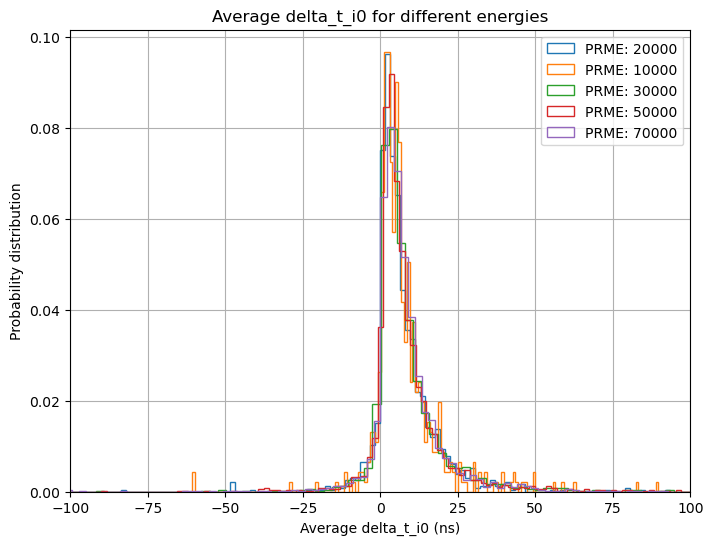

In [84]:
plt.figure(figsize=(8, 6))
for energy in e_unique:
    data=energies_and_deltasi0[energy]
    bin_num=200
    plt.hist(data, bins=bin_num, histtype="step", density=True, label=f'PRME: {energy}')


plt.xlabel('Average delta_t_i0 (ns)')
plt.ylabel('Probability distribution')
plt.title('Average delta_t_i0 for different energies')
plt.legend()
plt.xlim([-100,100])    # X axis limits
plt.grid(True)
plt.show()


#### Plot delta_t_i0 for a specific energy

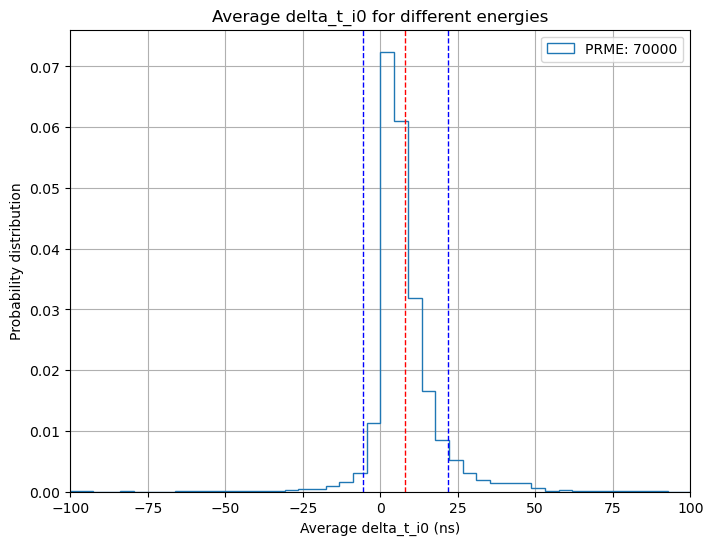

In [85]:
for energy in e_unique:
    if energy in [70000]:    ## Energy value
        data=energies_and_deltasi0[energy]
        mean=np.nanmean(data)
        sd=np.nanstd(data)
        bin_num=100
        
        plt.figure(figsize=(8, 6))
        plt.hist(data, bins=bin_num,histtype="step", density=True, label=f'PRME: {energy}')
        plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
        plt.axvline(mean + sd, color='b', linestyle='dashed', linewidth=1)
        plt.axvline(mean - sd, color='b', linestyle='dashed', linewidth=1)
        plt.xlabel('Average delta_t_i0 (ns)')
        plt.ylabel('Probability distribution')
        plt.title('Average delta_t_i0 for different energies')
        plt.legend()
        plt.xlim([-100,100])    # X axis limits
        plt.grid(True)
        plt.show()


#### Plot all delta_t_ij

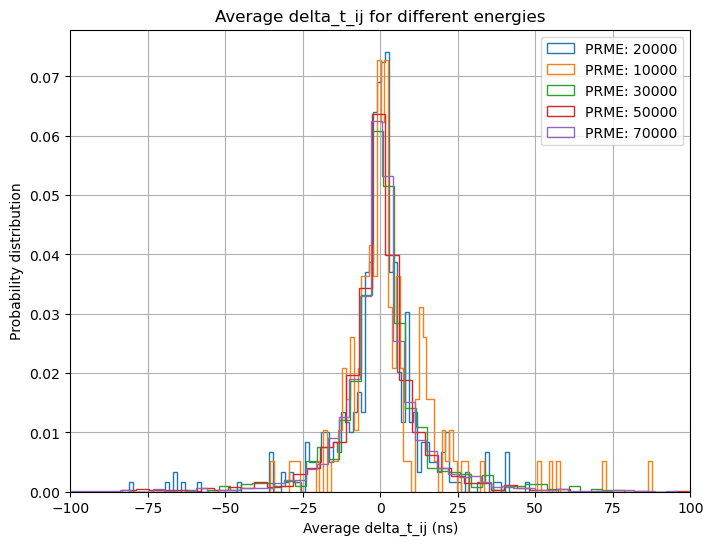

In [86]:
plt.figure(figsize=(8, 6))

for energy in e_unique:
    data=energies_and_deltasij[energy]
    bin_num=100
    plt.hist(data, bins=bin_num,histtype="step", density=True, label=f'PRME: {energy}')


plt.xlabel('Average delta_t_ij (ns)')
plt.ylabel('Probability distribution')
plt.title('Average delta_t_ij for different energies')
plt.legend()
plt.xlim([-100,100])    # X axis limits
plt.grid(True)
plt.show()


#### Plot delta_t_ij for a specific energy

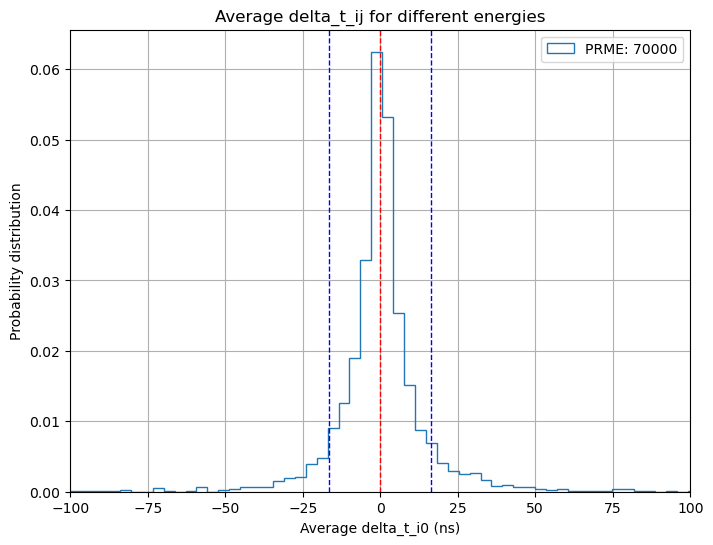

In [87]:
plt.figure(figsize=(8, 6))
for energy in e_unique:
    if energy in [70000]:    ## Energy value
        data=energies_and_deltasij[energy]
        mean=np.nanmean(data)
        sd=np.nanstd(data)
        bin_num=100
        plt.hist(data, bins=bin_num,histtype="step", density=True, label=f'PRME: {energy}')
        plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
        plt.axvline(mean + sd, color='b', linestyle='dashed', linewidth=1)
        plt.axvline(mean - sd, color='b', linestyle='dashed', linewidth=1)

plt.xlabel('Average delta_t_i0 (ns)')
plt.ylabel('Probability distribution')
plt.title('Average delta_t_ij for different energies')
plt.legend()
plt.xlim([-100,100])    # X axis limits
plt.grid(True)
plt.show()


### density distributions

#### Plot all delta_t_i0

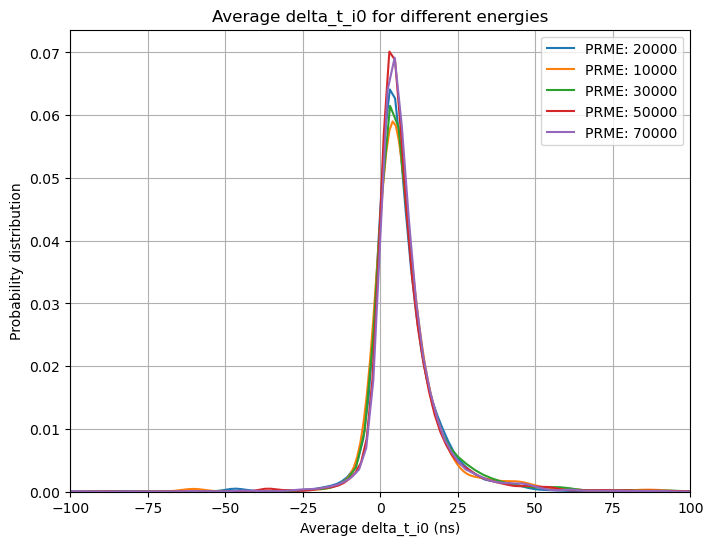

In [88]:
plt.figure(figsize=(8, 6))
for energy in e_unique:
    data=energies_and_deltasi0[energy]
    bin_num=200
    sns.kdeplot(data,label = f'PRME: {energy}')


plt.xlabel('Average delta_t_i0 (ns)')
plt.ylabel('Probability distribution')
plt.title('Average delta_t_i0 for different energies')
plt.legend()
plt.xlim([-100,100])    # X axis limits
plt.grid(True)
plt.show()


#### Plot delta_t_i0 for a specific energy

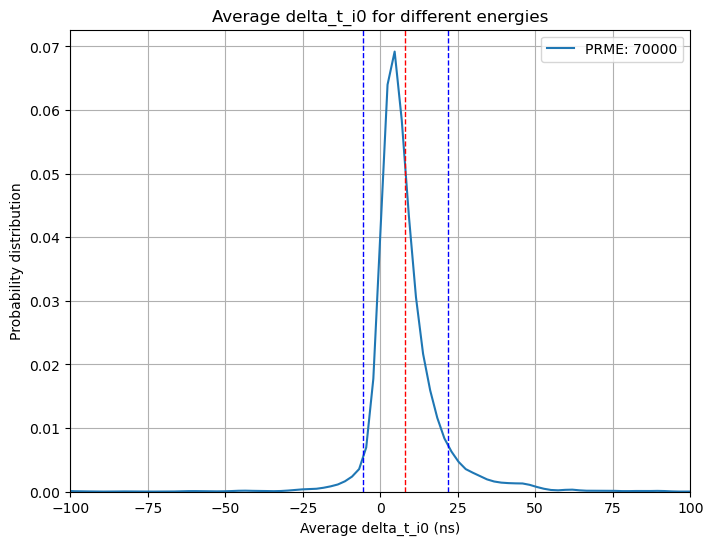

In [89]:
for energy in e_unique:
    if energy in [70000]:    ## Energy value
        data=energies_and_deltasi0[energy]
        mean=np.nanmean(data)
        sd=np.nanstd(data)
        bin_num=100
        
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data,label = f'PRME: {energy}')
        plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
        plt.axvline(mean + sd, color='b', linestyle='dashed', linewidth=1)
        plt.axvline(mean - sd, color='b', linestyle='dashed', linewidth=1)
        plt.xlabel('Average delta_t_i0 (ns)')
        plt.ylabel('Probability distribution')
        plt.title('Average delta_t_i0 for different energies')
        plt.legend()
        plt.xlim([-100,100])    # X axis limits
        plt.grid(True)
        plt.show()


#### Plot all delta_t_ij

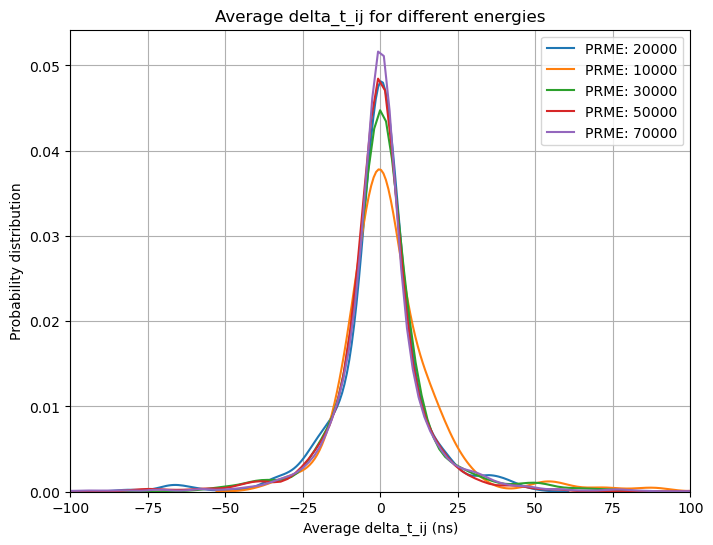

In [90]:
plt.figure(figsize=(8, 6))

for energy in e_unique:
    data=energies_and_deltasij[energy]
    bin_num=100
    sns.kdeplot(data,label = f'PRME: {energy}')


plt.xlabel('Average delta_t_ij (ns)')
plt.ylabel('Probability distribution')
plt.title('Average delta_t_ij for different energies')
plt.legend()
plt.xlim([-100,100])    # X axis limits
plt.grid(True)
plt.show()


#### Plot delta_t_ij for a specific energy

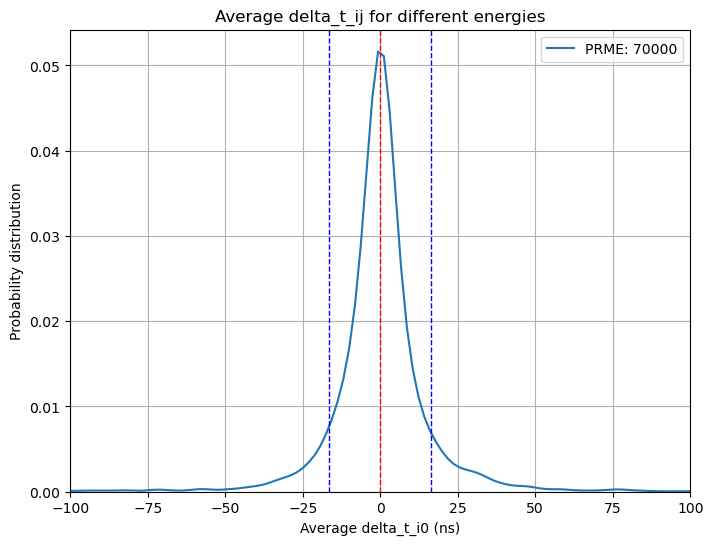

In [91]:
plt.figure(figsize=(8, 6))
for energy in e_unique:
    if energy in [70000]:    ## Energy value
        data=energies_and_deltasij[energy]
        mean=np.nanmean(data)
        sd=np.nanstd(data)
        bin_num=100
        sns.kdeplot(data,label = f'PRME: {energy}')
        plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
        plt.axvline(mean + sd, color='b', linestyle='dashed', linewidth=1)
        plt.axvline(mean - sd, color='b', linestyle='dashed', linewidth=1)

plt.xlabel('Average delta_t_i0 (ns)')
plt.ylabel('Probability distribution')
plt.title('Average delta_t_ij for different energies')
plt.legend()
plt.xlim([-100,100])    # X axis limits
plt.grid(True)
plt.show()
